Implementation of Perceptron for classification  
Author: Tuan Le  
Email: tuanle@hotmail.de

In [1]:
#Load all needed libraries:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [2]:
#Define Perceptron class:
class Perceptron(object):
    """
    Perceptron Classifier.
    
    Parameter
    ---------
    eta : float
        Learning rate (between 0..0 and 1.0)
    max_iter : int
        Passes (epochs) over the training set.
    
    Attributes
    ---------
    w : 1d-array
        Weights after fitting.
    eta: float
        Learning rate
    max_iter: int
        maximal number of iterations
    """
    
    ### Constructor: ###
    def __init__(self, eta=0.1, max_iter=1000):
        '''
        Init method for Perceptron.
        
        Parameters
        ----------
        eta : Learning rate
        max_iter : Maximal iteration number
            
        Returns
        -------
        perceptron object : a perceptron object for classification
        '''
        self.eta = eta
        self.max_iter = max_iter
        self.weights = None
        self.inter_weights = []
      
    ### Train method: ###
    def train (self, X, Y):
        '''
        Training method for data.
        
        Parameters
        ----------
        X : Training vectors
        y : Target values
            
        Returns
        -------
        w_ : 1d-array; Weights after fitting.
        '''
        
        #Get sample information
        (n_samples, n_features) = X.shape
        #Initialize random weights element (including bias) [0,1] for learning
        self.weights = np.random.rand(n_features+1, 1)
        #Concatenate 1 vector for bias modeling
        X = np.c_[np.ones((n_samples, 1)), X]
        #Compute prediction by applying sign function over weighted sum
        weighted_sum = np.dot(X, self.weights)
        Y_hat = np.sign(weighted_sum)
        #Iterate over training set and apply learning rule:
        for iteration in range(0, self.max_iter):
            #If prediction is correct:break and go to next observation, note here vectors will be compared
            if np.array_equal(Y, Y_hat):
                break
            #If there are misprediction iterate over full training sample (batch) and apply weights learning
            for sample in range(0, n_samples):
                if Y[sample] != Y_hat[sample]:
                    self.weights += self.eta * Y[sample] * X[sample][:, np.newaxis]
                    self.inter_weights.append(np.copy(self.weights))
                    Y_hat = np.sign(np.dot(X, self.weights))
        return self.weights

In [3]:
## Generate data function for learning:
def generate_data(n, dim):
    '''
    Generating training data.
        
    Parameters
    ----------
    n : the number of samples 
    dim: number of features.

    Returns
    -------
    X : training vectors
    '''
    #create half of n random numbers being element [-1,0]
    X1 = np.random.rand(n//2, dim) - 1
    #create another half of n random numbers being element [0,1]
    X2 = np.random.rand(n - n//2, dim)
    #row bind the data into one frame
    X = np.r_[X1, X2]
    #create -1 output values for half data to classify
    Y1 = np.zeros((n - n//2, 1)) - 1
    #create 1 output values for rest of half data to classify
    Y2 = np.ones((n//2, 1))
    #rowbind into one single vector
    Y = np.r_[Y1, Y2]
    return X, Y

In [4]:
##Plot functions in two dimensional feature space
def plot2D(X, Y, p):
    '''
    Plots the data points and the separating hyperplane in the two dimensional case
    
    Parameters
    ----------
    X: matrix containing the data points
    Y: label of the data points
    p: instance of trained perceptron model
    '''
    #create plot object
    plt.figure()
    #create scatterplot taking first two dimensions of X-Matrix
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten())
    #save inter_weights objects into variable
    inter_weights = p.inter_weights
    for index, weights in enumerate(inter_weights):
        #slope a
        a = - weights[1] / weights[2]
        #intercept b
        b = - weights[0] / weights[2]
        x = [-1, 1]
        y = [a*e+b for e in x]
        if index == len(inter_weights) - 1:
            plt.plot(x, y, 'r-')
        else:
            plt.plot(x, y, 'b--')
    plt.show()

Printing generated data:
[[-0.97322898 -0.42068827]
 [-0.9002936  -0.53687105]
 [-0.57763557 -0.89798504]
 [-0.25750757 -0.52305615]
 [-0.10629991 -0.94573276]
 [ 0.27789343  0.4586517 ]
 [ 0.58134261  0.58796   ]
 [ 0.35166931  0.30575911]
 [ 0.75428118  0.92014991]
 [ 0.71128019  0.61409058]]
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


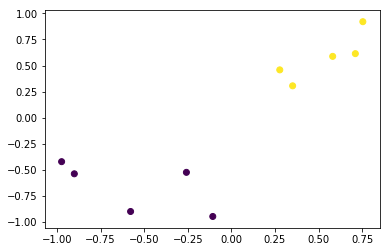

In [5]:
##Apply learning:

#1) generate random data: 10 observations and 2 features 
rnd.seed(123)
X, Y = generate_data(10, 2)
print("Printing generated data:")
print(X)
print(Y)

#2) Peceptron:
#a) create object
perceptron = Perceptron()
print(perceptron)
#b) call method to train on X and Y data
perceptron.train(X, Y)
#c) plot the results
plot2D(X, Y, perceptron)

[[1 1 0]
 [1 0 1]
 [0 1 1]
 [0 0 0]]


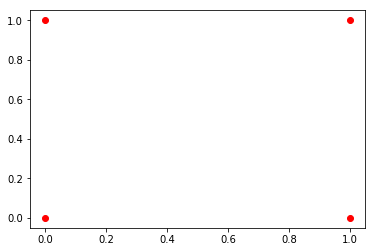

In [6]:
## XOR Example:
xor = np.matrix([[1, 1], [1, 0], [0,1], [0,0]])
target = np.array([0,1,1,0])

data = np.c_[xor,target]
print(data)

plt.plot(xor[:, 0], xor[:, 1],"ro", marker="o")
plt.show()
#learn:
perceptron2 = Perceptron()
#b) call method to train on X and Y data

In [7]:
### Image classification using naive black and white flagging:
one = [
    [0,1,0],
    [0,1,0],
    [0,1,0],
    [0,1,0],
    [0,1,0]
]
two = [
    [1,1,1],
    [0,0,1],
    [1,1,1],
    [1,0,0],
    [1,1,1]
]
three = [
    [1,1,1],
    [0,0,1],
    [0,1,1],
    [0,0,1],
    [1,1,1]
]
four = [
    [1,0,1],
    [1,0,1],
    [1,1,1],
    [0,0,1],
    [0,0,1]
]
five = [
    [1,1,1],
    [1,0,0],
    [1,1,1],
    [0,0,1],
    [1,1,1]
]
six = [
    [1,1,1],
    [1,0,0],
    [1,1,1],
    [1,0,1],
    [1,1,1]
]
seven = [
    [1,1,1],
    [0,0,1],
    [0,0,1],
    [0,0,1],
    [0,0,1]
]
eight = [
    [1,1,1],
    [1,0,1],
    [1,1,1],
    [1,0,1],
    [1,1,1]
]
nine = [
    [1,1,1],
    [1,0,1],
    [1,1,1],
    [0,0,1],
    [1,1,1]
]
zero = [
    [1,1,1],
    [1,0,1],
    [1,0,1],
    [1,0,1],
    [1,1,1]
]
numbers = [one, two, three, four, five, six, seven, eight, nine, zero]

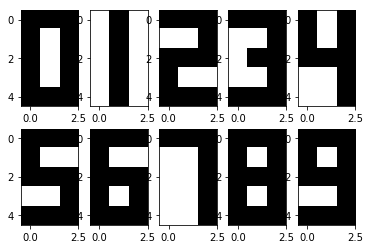

In [8]:
# convert numbers to numpy array
np_numbers = [np.array(element, dtype=float) for element in numbers]

# print all number via plt.imshow method
fig = plt.figure(0)
for index in range(0, 10):
    plt.subplot2grid((2, 5), (int(index / 5), index%5))
    plt.imshow(np_numbers[index-1], cmap='binary')
plt.show()